In [13]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from explore import run

df = run()
print(df)

                 id Word Transliteration                   Meaning  \
0     1621357700738   治る             なおる        be cured, get well   
1     1621357700436  起こす             おこす         wake (someone) up   
2     1621357700820   勝つ              かつ                       win   
3     1621357700736   開く              あく                      open   
4     1621357700978   準備            じゅんび  preparation, arrangement   
...             ...  ...             ...                       ...   
1995  1621385856021   偶然            ぐうぜん    by chance, coincidence   
1996  1621385856052  備える            そなえる  provide for, prepare for   
1997  1621385856065   報告            ほうこく                    report   
1998  1621385856088   欧米            おうべい        Europe and America   
1999  1621385856091   年中           ねんじゅう                  all year   

                  PoS          WordAudio  
0                Verb     [sound:治る.mp3]  
1                Verb    [sound:起こす.mp3]  
2                Verb     [sou

In [14]:
df['Meaning']

# Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Generate embeddings
embeddings = model.encode(df['Meaning'].tolist())

# Define the number of clusters
num_clusters = 3  # Adjust based on your data

# Perform clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Add cluster labels to the dataframe
df['Cluster'] = labels

# Print out the meanings in each cluster
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Meaning'].tolist())
    print()



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Cluster 0:
['open', 'preparation, arrangement', 'graduation', 'year, school year', 'last night, last evening (colloquial)', 'change (of money)', 'sell', 'open, unlock (doors, windows, etc.)', 'evening, night (from sunset to bedtime)', 'society', 'schedule, plan', 'postage stamp', 'day after tomorrow (colloquial)', 'desk', 'Heisei era', 'home, family', "office, one's place of business", 'how much (money)', 'last week', 'about when, about what time', 'passing an examination', 'thousand', 'sellout, sold out', 'term, period', 'ticket gate', 'age, era', 'morning, a.m.', 'put, place', 'number', 'in the near future, before long', 'ten days, tenth of the month', 'last year (formal, often used in writing)', 'free of charge', 'century', 'season', 'every year (colloquial)', 'date and time', 'elevator', 'class session, lecture', 'week', 'Sunday', 'six days, sixth of the month', '20 days, 20th of the month', 'street, way', 'recent, latest', 'post office', 'address', 'right side', 'intersection', 'i

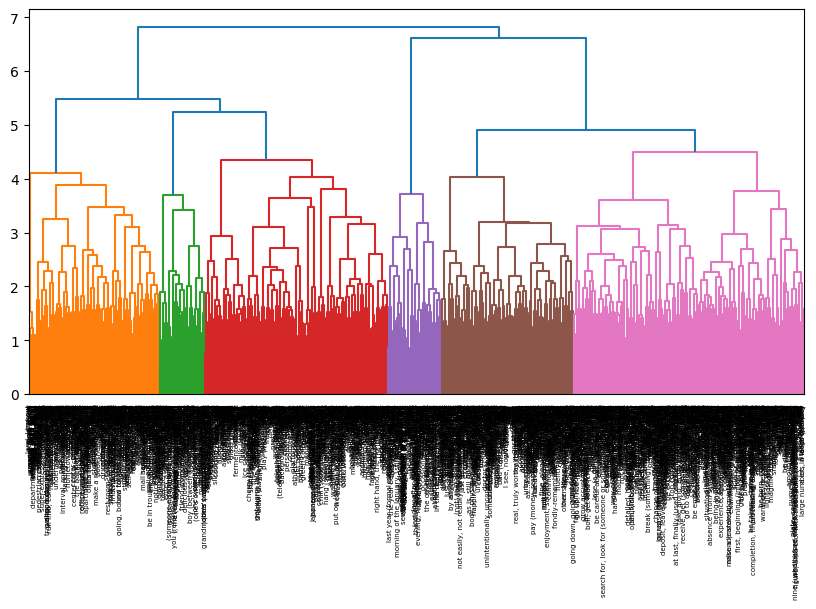

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(embeddings, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df['Meaning'].tolist(), leaf_rotation=90)
plt.show()

# Determine clusters dynamically based on a distance threshold
distance_threshold = 1.5  # Adjust this value to get more/fewer clusters
df['Cluster'] = fcluster(Z, t=distance_threshold, criterion='distance')


In [19]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')  # Adjust eps for your data
labels = dbscan.fit_predict(embeddings)

# Add labels to the dataframe
df['Cluster'] = labels
df['Cluster'].unique()
# Note: -1 indicates outliers that were not clustered


array([ 0,  1,  2, -1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18])

In [34]:
import hdbscan

# Perform HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='euclidean')
labels = clusterer.fit_predict(embeddings)

# Add labels to the dataframe
df['Cluster'] = labels
df['Cluster'].unique()
df
# Note: -1 indicates noise points not assigned to any cluster


,id,Word,Transliteration,Meaning,PoS,WordAudio,Cluster
0,1621357700738,治る,なおる,"be cured, get well",Verb,[sound:治る.mp3],-1
1,1621357700436,起こす,おこす,wake (someone) up,Verb,[sound:起こす.mp3],88
2,1621357700820,勝つ,かつ,win,Verb,[sound:勝つ.mp3],-1
3,1621357700736,開く,あく,open,Verb,[sound:開く-2.mp3],-1
4,1621357700978,準備,じゅんび,"preparation, arrangement",Verbal Noun,[sound:準備.mp3],100
...,...,...,...,...,...,...,...
1995,1621385856021,偶然,ぐうぜん,"by chance, coincidence",Adjectival Noun,[sound:偶然-2.mp3],-1
1996,1621385856052,備える,そなえる,"provide for, prepare for",Verb,[sound:備える-2.mp3],-1
1997,1621385856065,報告,ほうこく,report,Verbal Noun,[sound:報告-2.mp3],-1
1998,1621385856088,欧米,おうべい,Europe and America,Noun,[sound:欧米-2.mp3],-1


In [30]:
clustered_without_outliers = df[df['Cluster'] != -1]
clustered_without_outliers.sort_values('Cluster')





In [36]:
# Filter out noise points (-1)
filtered_df = df[df['Cluster'] != -1]

# Iterate through unique clusters and print Kanji + Meaning
for cluster_id in filtered_df['Cluster'].unique():
    print(f"Cluster {cluster_id}:")
    cluster_items = filtered_df[filtered_df['Cluster'] == cluster_id]
    for _, row in cluster_items.iterrows():
        print(f"Kanji: {row['Word']} {row['Transliteration']}, Meaning: {row['Meaning']}")
    print()

Cluster 88:
Kanji: 起こす おこす, Meaning: wake (someone) up
Kanji: 眠い ねむい, Meaning: sleepy
Kanji: 覚める さめる, Meaning: awake, wake up (naturally)
Kanji: 覚ます さます, Meaning: awaken, wake up

Cluster 100:
Kanji: 準備 じゅんび, Meaning: preparation, arrangement
Kanji: まとめる まとめる, Meaning: gather together, put in order
Kanji: 集まる あつまる, Meaning: gather, be collected
Kanji: 集める あつめる, Meaning: collect, gather
Kanji: 並べる ならべる, Meaning: line up, arrange

Cluster 63:
Kanji: 腰 こし, Meaning: waist, lower back
Kanji: お腹 おなか, Meaning: stomach, belly

Cluster 181:
Kanji: 年度 ねんど, Meaning: year, school year
Kanji: 期間 きかん, Meaning: term, period
Kanji: 年間 ねんかん, Meaning: period of one year
Kanji: 年 とし, Meaning: year, age
Kanji: 年月 ねんげつ, Meaning: years, period of time

Cluster 138:
Kanji: 載せる のせる, Meaning: place, put on
Kanji: 被る かぶる, Meaning: wear, put on (on one's head)
Kanji: 置く おく, Meaning: put, place
Kanji: 所 ところ, Meaning: place
Kanji: 仕舞う しまう, Meaning: put away, put in
Kanji: 職場 しょくば, Meaning: place of work, office
Ka